## ANOVA of two active ingredients (A & B) in the compound for the relief of severe cases of hay fever:

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

## First of all I have done all the initial importing and analysis. Solutions starting from Q1 can be found after In[10]:

In [2]:
#Loading the dataset
df=pd.read_csv('Fever-1.csv')

In [3]:
#Checking the top 5 records
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
#shape and information
df.shape

(36, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [6]:
#Checking the summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
B,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
Volunteer,36.0,2.500000,1.133893,1.0,1.750,2.5,3.250,4.0
Relief,36.0,7.183333,3.272090,2.3,4.675,6.0,9.325,13.5


In [7]:
#Checking for missing values
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [8]:
#Checking distinct values of ingredients A
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [9]:
#Checking distinct values of ingredients B
df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

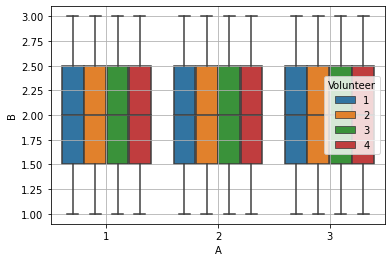

In [10]:
#Creating box plots of ingredients A&B
sns.boxplot(x="A", y="B", data=df, hue='Volunteer')
plt.grid()
plt.show()

**Q 1.1 State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.**

**Hypothesis of the One-way ANOVA of Relief' variable with the ingredient 'A' variable**

H0 : The means of 'Relief' variable with respect to each amount of ingredient A is equal
H1 : At least one of the means of 'Relief' variable with respect to each amount of ingredient A is unequal.

**Hypothesis of the One-way ANOVA of Relief' variable with the ingredient 'B' variable**

H0 : The means of 'Relief' variable with respect to each amount of ingredient B is equal
H1 : At least one of the means of 'Relief' variable with respect to each amount of ingredient B is unequal.

**Q1.2 Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.**

In [11]:
#One-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


**Insight:**
- p-value is smaller than chosen alpha level α = 0.05, so null hypothesis can be rejected
- While calucating in Ecxel we find a different P value than python, though that value is also smaller than alpha level=0.05, null hypothesis is rejected

Note: Excel file has also been attached while submitting the reference attachements 

**Q1.3 Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.**

In [12]:
#One-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


**Insight:**
- p-value is greater than chosen alpha level α = 0.05, so null hypothesis can not be rejected. Hence, we accept the Null Hypothesis

**Q1.4 Analyse the effects of one variable on another with the help of an interaction plot.
What is an interaction between two treatments?**

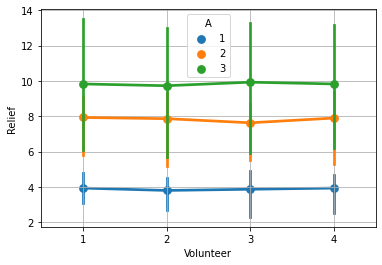

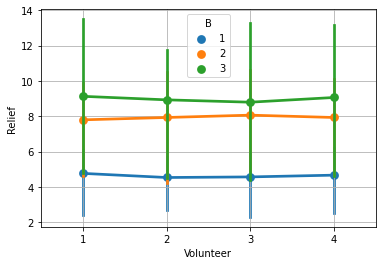

In [14]:
#Analysis of the effects of one variable on another with the help of an interaction plot.

sns.pointplot(x = 'Volunteer', y = 'Relief', hue='A', data=df)
plt.grid()
plt.show()
sns.pointplot(x = 'Volunteer', y = 'Relief', hue='B', data=df)
plt.grid()
plt.show()

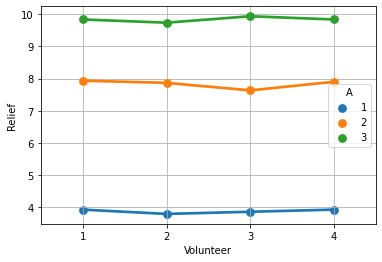

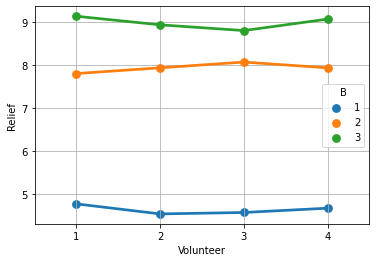

In [15]:
#Analyse of the effects of one variable on another with the help of an interaction plot.

sns.pointplot(x= 'Volunteer', y= 'Relief', hue='A', data=df,ci= None)
plt.grid()
plt.show()
sns.pointplot(x= 'Volunteer', y= 'Relief', hue='B', data=df,ci= None)
plt.grid()
plt.show()

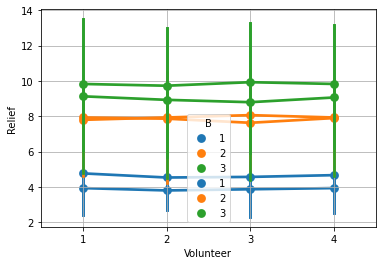

In [16]:
sns.pointplot(x = 'Volunteer', y = 'Relief', hue='A', data=df)

sns.pointplot(x = 'Volunteer', y = 'Relief', hue='B', data=df)
plt.grid()
plt.show()

**Insights from the graphs (Pairplots):**

- The second amount variation for both ingredients A and B have very strong interaction with the third variation.
- In the case of Ingredient A and Volunteer 2, the highest interaction for 2nd and 3rd amount variation can be observed while amount 1 has no interaction from other amount variation. The relief is also the lowest from amount 1.
- We can observe the strong evidence of interaction between the variation 2 and 3. For volunteer 3 the interaction is strongest and the difference in terms of relief is less than one. While looking into amount 1 of ingredient B the interaction is weakest.



**Q1.5 Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.**

- **H0: The means of the 'Relief' variable with respect to each ingredient category and their interaction is equal.**
- **H1: At least one of the means of 'Relief' variable with respect to each ingredient category and their interaction is unequal.**


In [18]:
#Two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') 
model=ols('Relief ~ C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table=anova_lm(model,type=2)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


**Insights:**
- After performing two-way Anova on the different variable (A and B) along with the interaction of variables with Relief variable, it is found that there is no significant value as all values of P in each case is greater than the value of alpha α=0.05

**Note: While calculating in Excel the result is same in nature as python though P value had different values.**			


**Q1.6 Mention the business implications of performing ANOVA for this particular case study.**

**Quality and Cost Comparison:**
- In the graph it can be seen that the amount three of both ingredients A and B is most effective for relief in fever. The best quality of medicine can be made while using the third amount and it can be sold at premium cost. In case of severe case offever this dose can be implemeted.							
- It can also bee seen that for both ingredients A and B for amount 1 (marked in Blue in graph) is not much effective in term of relief from fever. 							
- The different combination can be compaired for the medicine for the ingredients A and B							
							
**Production Optimization:**
- The different combination of Ingredients can be used as per the requirement of treatment, effectivity, and also market requirements. The A/B test can be performed for the better oucomes from the medicine.							
- For different types of patients the different or specific doeses could be produced on the basis of predictive analysis.					
